## 3.11.4 多项式函数拟合实验

In [89]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

⽣成数据集 <br/>
y = 1.2x − 3.4x^2 + 5.6x^3 + 5 + ϵ,

In [122]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = nd.random.normal(shape=(n_train + n_test, 1))  # (200, 1)
poly_features = nd.concat(features, nd.power(features, 2), nd.power(features, 3))  # (200, 3)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)  # 噪声项e

In [123]:
features[:2], poly_features[:2], labels[:2]  # 生成数据前的两个样本

(
 [[1.0268939 ]
  [0.66323954]]
 <NDArray 2x1 @cpu(0)>,
 
 [[1.0268939  1.054511   1.0828708 ]
  [0.66323954 0.4398867  0.29175025]]
 <NDArray 2x3 @cpu(0)>,
 
 [8.711012 5.934074]
 <NDArray 2 @cpu(0)>)

定义、训练和测试模型

In [124]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None, legend=None, figsize=(3.5, 2.5)):
    """作图"""
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [125]:
num_epochs, loss = 100, gloss.L2Loss()
# num_epochs = 1000  # 增加epoch

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})  # lr: 0.01
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
          '\nbias:', net[0].bias.data().asnumpy())

三阶多项式函数拟合（正常）

final epoch: train loss 0.007120279 test loss 0.0068887663
weight: [[ 1.2542982 -3.3786654  5.5863895]] 
bias: [4.96232]


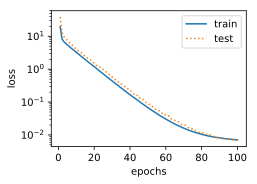

In [46]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

线性函数拟合（⽋拟合）

final epoch: train loss 41.3042 test loss 48.419277
weight: [[14.636942]] 
bias: [1.1887435]


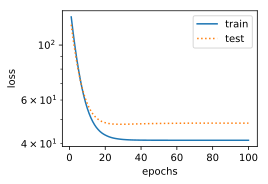

In [34]:
# 用线性函数拟合三阶多项式函数
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

训练样本不⾜（过拟合）

final epoch: train loss 0.48284656 test loss 134.29805
weight: [[1.9822392 1.9652437 2.0623448]] 
bias: [2.498562]


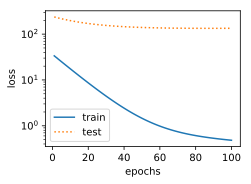

In [7]:
# 训练样本不足
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])

练习

final epoch: train loss 0.006805544 test loss 0.007920766
weight: [[1.1060305  0.02858285 0.02323592]] 
bias: [4.967233]


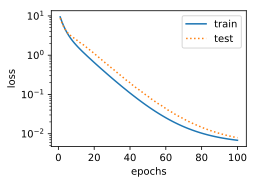

In [14]:
# 三阶多项式拟合线性函数
linear_data, linear_train, linear_w, linear_b = 200, 100, 1.2, 5  # 数据总数 训练集 weight bias
linear_features = nd.random.normal(shape=(linear_data, 1))
linear_labels = linear_w * linear_features + linear_b
e = nd.random.normal(scale=0.1, shape=linear_labels.shape)  # 噪声
linear_labels = linear_labels + e

# 三节多项式features
p_features = nd.concat(linear_features, nd.power(linear_features, 2), nd.power(linear_features, 3))  # (200, 3)

fit_and_plot(p_features[:linear_train, :], p_features[linear_train:, :], 
             linear_labels[:linear_train], linear_labels[linear_train:])

final epoch: train loss 0.00076070556 test loss 0.0008818476
weight: [[ 1.2398852 -3.3835971  5.589885 ]] 
bias: [4.9566164]


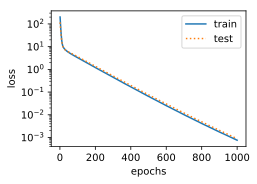

In [126]:
# 有没有可能把100个样本的训练误差的期望降到0
# 取消噪声并且调整超参数(epoch lr)后 loss可以无限接近0
labels -= nd.random.normal(scale=0.1, shape=labels.shape)  # 取消噪声项e
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])